# Introduction

I have created a series of python "notebooks" that produce/replicate the results in our Family Business Report PTSD prevalence paper that Ed is the lead author on. These notebooks are a mixture of Python code and markdown comments. If you are reading these without Python (e.g., as a .html file) you can browse the results and code but you will need Python installed to actually edit it.

1. Notebook 1 - Prevalence, response rates & demographics (this one)
2. Notebook 2 - Trauma related variables
3. Notebook 3 - cormobid and substance disorders

The original Notebooks can be found at G:\FMH\COMMON\Research\Family Business\Project Part 2 - 2015\Paper 1 Prevalence of PTSD\2_Analyses\FBR_Prevalence\

### PTSD Prevalence & response rates

Prevalence calculation that takes into account the original screened population (n = 156) and that the final samples were biased. Also, the sensitivity/specificity of the BSSS measure as a screening tool.

In the case of contingency tables greater than 2 x 2 (e.g., Age) - ignore the CIs.

In [6]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [7]:
# might be good to have this work programatically - much of this is hard coded.
import numpy as np

nTotal = 233
Released = 48
Declined = 25
Excluded = 4
Remaining = nTotal - (Released + Declined + Excluded)

print('Released = ',Released,',', np.round((Released/nTotal)*100,2),'%')
print('Declined = ',Declined,',', np.round((Declined/nTotal)*100,2),'%')
print('Excluded = ',Excluded,',', np.round((Excluded/nTotal)*100,2),'%')
print('Remaining = ',Remaining,',', np.round((Remaining/nTotal)*100,2),'%')

nTotal = Remaining
neg_screen = 66
pos_screen = 90

positive_cidi_positive_screen = 51/87
positive_cidi_negative_screen = 9/29
negative_cidi_positive_screen = 36/87
negative_cidi_negative_screen = 20/29

print("Pos CIDI pos BSSS: ",np.round(positive_cidi_positive_screen*100,2),'%')
print("Pos CIDI neg BSSS: ",np.round(positive_cidi_negative_screen*100,2),'%')
print("Neg CIDI pos BSSS: ",np.round(negative_cidi_positive_screen*100,2),'%')
print("Neg CIDI neg BSSS: ",np.round(negative_cidi_negative_screen*100,2),'%')

prev = (neg_screen * positive_cidi_negative_screen) + (pos_screen * positive_cidi_positive_screen)
prev = prev / nTotal
print("prevalence: ",np.round((prev)*100,2),"%")

z = 1.96

prevCI = prev*((1-prev)/nTotal)
prevCI = np.sqrt(prevCI)
prevCI = z * prevCI

print("prevalence LCI: ",np.round((prev-prevCI)*100,2),"%, prevalence UCI: ",np.round((prev+prevCI)*100,2),"%,")

Released =  48 , 20.6 %
Declined =  25 , 10.73 %
Excluded =  4 , 1.72 %
Remaining =  156 , 66.95 %
Pos CIDI pos BSSS:  58.62 %
Pos CIDI neg BSSS:  31.03 %
Neg CIDI pos BSSS:  41.38 %
Neg CIDI neg BSSS:  68.97 %
prevalence:  46.95 %
prevalence LCI:  39.12 %, prevalence UCI:  54.78 %,


### Demographic data comparing PTSD and no-PTSD cohorts.

Calculates odds ratios for:
- Age groups (although not reported in text)
- Currently in a relationship
- Education < year 10
- Custody status
- Youth detention

T-tests performed for:
- Age
- Number of adult incarcerations
- Time in adult custody

Prints basic numbers and outputs the key information in a .csv in the format (same for all outputs).

### Odds Ratios

In [8]:
import pandas as pd
import numpy as np
from prevalence_functions import *

df  = pd.read_excel('116_booklet_LJH.xlsx','116_booklet_LJH')

PTSD = df['ICD_PTSD12m'].values
PTSD = PTSD-1

data = df[['Age_abs','relationship_dummy','Edu<10','custody_status','Youth_det_dummy']]
var_labels = list(data)
data = data.values

filename = 'Notebook1.csv'
head = ["Var", "N NoPTSD","% NoPTSD","N PTSD","% NoPTSD","N Total","% Total",
        "OR", "LCI","UCI","X2","p"]

with open(filename,'w') as newFile:
    newFileWriter = csv.writer(newFile)
    newFileWriter.writerow(head)

results_master(filename,data,var_labels,PTSD)

dataPrint = pd.read_csv(filename,header = 0) # load data
dataPrint.head(len(dataPrint))

,Var,N NoPTSD,% NoPTSD,N PTSD,% NoPTSD.1,N Total,% Total,OR,LCI,UCI,X2,p
0,Age_abs,10.0,17.86,18.0,30.00,28.0,24.14,1.93,0.76,4.92,2.35,0.309
1,"['Age_abs', 1]",29.0,51.79,27.0,45.00,56.0,48.28,1.93,0.76,4.92,2.35,0.309
2,"['Age_abs', 2]",17.0,30.36,15.0,25.00,32.0,27.59,1.93,0.76,4.92,2.35,0.309
3,relationship_dummy,33.0,58.93,34.0,56.67,67.0,57.76,0.91,0.44,1.91,0.00,0.953
4,Edu<10,22.0,39.29,26.0,43.33,48.0,41.38,1.18,0.56,2.48,0.06,0.800
5,custody_status,30.0,54.55,21.0,36.21,51.0,45.13,0.38,0.16,0.87,5.50,0.064
6,"['custody_status', 1]",15.0,27.27,28.0,48.28,43.0,38.05,0.38,0.16,0.87,5.50,0.064
7,"['custody_status', 2]",10.0,18.18,9.0,15.52,19.0,16.81,0.38,0.16,0.87,5.50,0.064
8,Youth_det_dummy,17.0,30.36,27.0,45.00,44.0,37.93,1.88,0.87,4.03,2.05,0.152


#### Plot the results

Below is a plot of the odds ratios and associated confidence intervals for the 8 variables. As each CI goes below 1, none of these are significant.

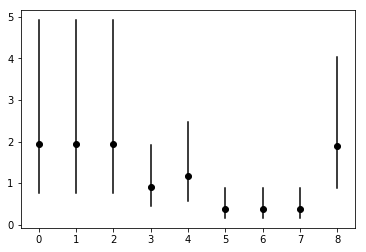

In [9]:
import matplotlib.pyplot as plt

for i in range(0,len(dataPrint)):
    plt.plot([i, i], [dataPrint["LCI"][i], dataPrint["UCI"][i]], 'k-')
    if dataPrint["p"][i] < 0.05:
        plt.plot([i,i],[0,1], 'r-')
        
plt.scatter(range(0,len(dataPrint)),dataPrint["OR"],color='k')
plt.show()

### T-tests

In [10]:
data = df[['Age_yr','numtimecustadult','DurAdultCustTotal']]
var_labels = list(data)
data = data.values

filename = 'demo_tTests.csv'
head = ["Var", "Mean","std","Mean","std","t","p","cohen's d"]

with open(filename,'w') as newFile:
    newFileWriter = csv.writer(newFile)
    newFileWriter.writerow(head)
    
ptsd_ttest(filename,data,var_labels,PTSD)
    
dataPrint = pd.read_csv(filename,header = 0) # load data
dataPrint.head(len(dataPrint))

,Var,Mean,std,Mean.1,std.1,t,p,cohen's d
0,Age_yr,31.64,7.94,29.82,8.08,1.22,0.23,0.23
1,numtimecustadult,4.51,5.42,4.28,4.25,0.25,0.81,0.05
2,DurAdultCustTotal,23.77,39.10,29.80,36.03,-0.83,0.41,-0.16
